# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [33]:
df = pd.read_csv('/content/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [34]:
print("Shape of dataframe: " , df.shape)

Shape of dataframe:  (12316, 32)


In [35]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [36]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [37]:
print(df.dtypes)

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [38]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [39]:
df.drop([
'Vehicle_driver_relation',  'Driving_experience', 'Owner_of_vehicle',
'Service_year_of_vehicle', 'Defect_of_vehicle','Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
'Type_of_collision',  'Number_of_vehicles_involved','Number_of_casualties','Vehicle_movement',
'Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Work_of_casuality',
'Fitness_of_casuality' , 'Pedestrian_movement'], axis=1, inplace=True)

In [40]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Type_of_vehicle', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [41]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Automobile,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Public (> 45 seats),Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Lorry (41?100Q),Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Public (> 45 seats),Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Lorry (11?40Q),No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Automobile,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Bajaj,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,Slight Injury


In [42]:
print(df.isnull().sum())

Time                    0
Day_of_week             0
Age_band_of_driver      0
Sex_of_driver           0
Educational_level     741
Type_of_vehicle       950
Cause_of_accident       0
Accident_severity       0
dtype: int64


In [43]:
print(df.dtypes)

Time                  object
Day_of_week           object
Age_band_of_driver    object
Sex_of_driver         object
Educational_level     object
Type_of_vehicle       object
Cause_of_accident     object
Accident_severity     object
dtype: object


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [44]:
df["Educational_level"].mode()

,Educational_level
0,Junior high school


In [45]:
df["Educational_level"].fillna("Junior high school" , inplace =True)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Automobile,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Public (> 45 seats),Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Lorry (41?100Q),Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Public (> 45 seats),Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Lorry (11?40Q),No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Automobile,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Bajaj,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,Slight Injury


In [46]:
df["Type_of_vehicle"].mode()

,Type_of_vehicle
0,Automobile


In [47]:
df["Type_of_vehicle"].fillna("Automobile" , inplace =True)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Automobile,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Public (> 45 seats),Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Lorry (41?100Q),Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Public (> 45 seats),Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Automobile,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Lorry (11?40Q),No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Automobile,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Bajaj,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,Slight Injury


In [48]:
print(df.isnull().sum())

Time                  0
Day_of_week           0
Age_band_of_driver    0
Sex_of_driver         0
Educational_level     0
Type_of_vehicle       0
Cause_of_accident     0
Accident_severity     0
dtype: int64


In [49]:
# normalize and scale the column (Sex_of_driver) Male:1 , Fmale:2

df['Sex_of_driver'].replace({
    'Unknown': np.nan,
    'Male':1,
    'Female':0,
},inplace=True)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,1.0,Above high school,Automobile,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,1.0,Junior high school,Public (> 45 seats),Overtaking,Slight Injury
2,17:02:00,Monday,18-30,1.0,Junior high school,Lorry (41?100Q),Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,1.0,Junior high school,Public (> 45 seats),Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,1.0,Junior high school,Automobile,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,1.0,Junior high school,Lorry (11?40Q),No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,1.0,Elementary school,Automobile,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,1.0,Junior high school,Bajaj,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,0.0,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,Slight Injury


In [50]:
# check the uniqe value in Accident_severity
print(df['Accident_severity'].unique())

['Slight Injury' 'Serious Injury' 'Fatal injury']


In [51]:
# normalize and scale the column (Accident_severity) Slight Injury': 1, 'Serious Injury':2, 'Fatal injury':3,

df['Accident_severity'].replace({
    'Slight Injury': 1,
    'Serious Injury':2,
    'Fatal injury':3,
},inplace=True)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,1.0,Above high school,Automobile,Moving Backward,1
1,17:02:00,Monday,31-50,1.0,Junior high school,Public (> 45 seats),Overtaking,1
2,17:02:00,Monday,18-30,1.0,Junior high school,Lorry (41?100Q),Changing lane to the left,2
3,1:06:00,Sunday,18-30,1.0,Junior high school,Public (> 45 seats),Changing lane to the right,1
4,1:06:00,Sunday,18-30,1.0,Junior high school,Automobile,Overtaking,1
...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,1.0,Junior high school,Lorry (11?40Q),No distancing,1
12312,18:00:00,Sunday,Unknown,1.0,Elementary school,Automobile,No distancing,1
12313,13:55:00,Sunday,Over 51,1.0,Junior high school,Bajaj,Changing lane to the right,2
12314,13:55:00,Sunday,18-30,0.0,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,1


In [52]:
# Label Encoding
le = LabelEncoder()

In [25]:
# Convert categorical text data into model-understandable numbers where the labels are ordered
df['Age_band_of_driver'] = le.fit_transform(df['Age_band_of_driver'])
df['Sex_of_driver'] = le.fit_transform(df['Sex_of_driver'])
df['Educational_level'] = le.fit_transform(df['Educational_level'])
df['Cause_of_accident'] = le.fit_transform(df['Cause_of_accident'])
df['Accident_severity'] = le.fit_transform(df['Accident_severity'])

In [26]:
print("DataFrame after Label Encoding:")
df

DataFrame after Label Encoding:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity
0,17:02:00,Monday,0,1,0,Automobile,9,0
1,17:02:00,Monday,1,1,4,Public (> 45 seats),16,0
2,17:02:00,Monday,0,1,4,Lorry (41?100Q),0,1
3,1:06:00,Sunday,0,1,4,Public (> 45 seats),1,0
4,1:06:00,Sunday,0,1,4,Automobile,16,0
...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,1,1,4,Lorry (11?40Q),10,0
12312,18:00:00,Sunday,4,1,1,Automobile,10,0
12313,13:55:00,Sunday,2,1,4,Bajaj,1,1
12314,13:55:00,Sunday,0,0,4,Lorry (41?100Q),5,0


In [27]:
# one hot encoder
one_hot_encoder = OneHotEncoder()

In [28]:
# Create OneHOt Encoded columns for nominal categorical data
one_hot_df = pd.DataFrame(one_hot_encoder.fit_transform(df[['Time', 'Day_of_week', 'Type_of_vehicle']]).toarray())
one_hot_df.columns = one_hot_encoder.get_feature_names_out(['Time', 'Day_of_week', 'Type_of_vehicle'])

In [30]:
# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity,Time_0:01:00,Time_0:02:00,...,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo
0,17:02:00,Monday,0,1,0,Automobile,9,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17:02:00,Monday,1,1,4,Public (> 45 seats),16,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,17:02:00,Monday,0,1,4,Lorry (41?100Q),0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1:06:00,Sunday,0,1,4,Public (> 45 seats),1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1:06:00,Sunday,0,1,4,Automobile,16,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,1,1,4,Lorry (11?40Q),10,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12312,18:00:00,Sunday,4,1,1,Automobile,10,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12313,13:55:00,Sunday,2,1,4,Bajaj,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12314,13:55:00,Sunday,0,0,4,Lorry (41?100Q),5,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


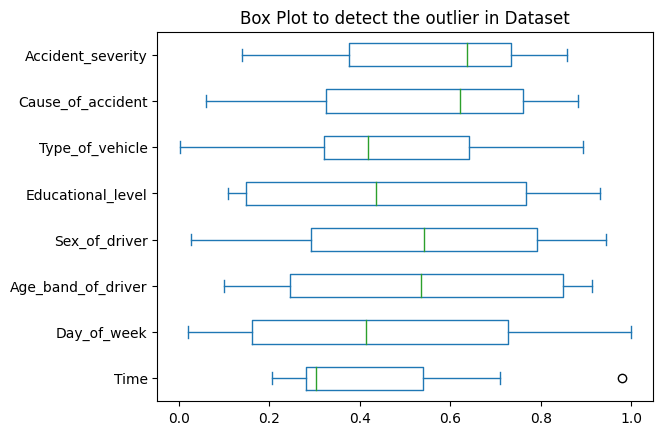

In [31]:
# Detect outliers using box plots
df = pd.DataFrame(np.random.rand(10, 8), columns=["Time", "Day_of_week", "Age_band_of_driver", "Sex_of_driver", "Educational_level", "Type_of_vehicle", "Cause_of_accident", "Accident_severity"])

df.plot.box(vert=False); # here i write the column name in the y axis to make it easy to understand (column name was long and mesy in x axis)
plt.title("Box Plot to detect the outlier in Dataset")
plt.show()

there is no outlier

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

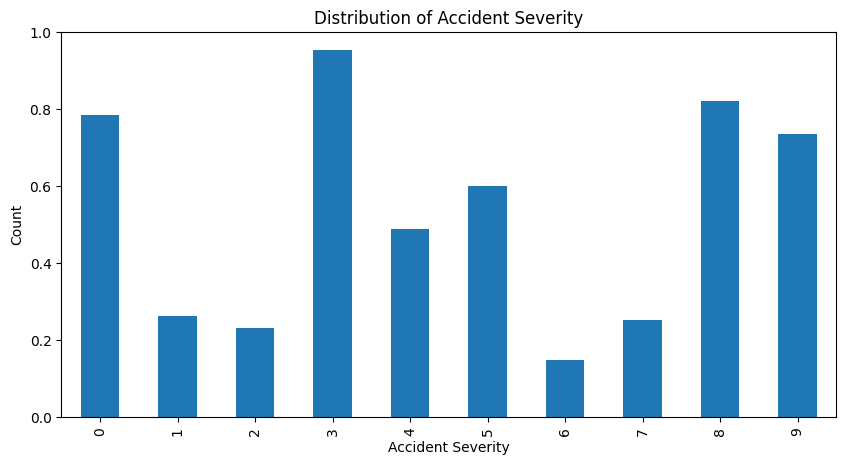

In [ ]:
# Bar plot of Accident_Severity distribution
plt.figure(figsize=(10, 5))
df['Accident_severity'].plot(kind='bar')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.show()

* The plot 3 was the highest of the Accident severity categories, 6 plot the lewest

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
# Here am inatalize and Split the dataset
X =  df.drop('Accident_severity', axis=1) # X is the Feature
y = df['Accident_severity'] # y is the Target variable  , the (Accident_severity) is the Target Column

# (train-test split)
# there 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Training
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]

model = LogisticRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[-4.80685757e-01 -4.80685757e-01]
 [-2.51891384e-06 -2.51891384e-06]
 [ 4.80688276e-01  4.80688276e-01]]
Intercept: [ 0.87336885  0.17600816 -1.04937701]


#### Decision Tree Classifier

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier()

#### Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

# Training
X = [[0, 0], [1, 1]]
y = [0, 1]

#Train svm
clf = svm.SVC()
clf.fit(X, y)
clf

SVC()

#### K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Training data
X_train = [[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]

y_train = [0, 0, 0, 1, 1, 1]

# Create and train the K-NN Classifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf

KNeighborsClassifier(n_neighbors=3)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
# The Evaluation for Logistic Regression
from sklearn.metrics import confusion_matrix

# predictions
y_pred = model.predict(X_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Precision and Recall
precision = precision_score(y, y_pred, average='macro')
recall = recall_score(y, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y, y_pred, average='macro')
print("F1 Score:", f1)

# ROC Curve and AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 7 features, but LogisticRegression is expecting 2 features as input.

In [ ]:
 # The evaluation for the Decision Tree Classifier
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 7 features, but DecisionTreeClassifier is expecting 4 features as input.

In [ ]:
# The evaluation for Support Vector Machine (SVM)

In [ ]:
# The evaluation for K-Neighbors Classifier

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: